# Investigating linear classifier templates

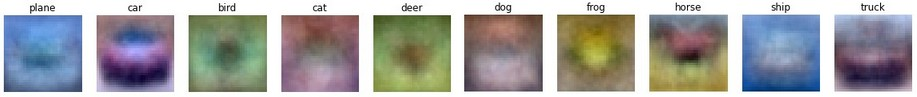

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=200, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=200, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
data = iter(trainloader).next()
imgs, labels = data
print(imgs[0].numpy().shape)

(3, 32, 32)


In [4]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(32*32*3, 10, bias=True)
        
    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = self.linear(x)
        x = F.log_softmax(x, dim=1)
        return x

In [6]:
model = LinearModel()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-7, weight_decay=2.5e4, momentum=0.9)
criterion = nn.CrossEntropyLoss()

In [7]:
for epoch in range(0, 100):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        optimizer.zero_grad()

        preds = model(inputs)
        loss = criterion(preds, targets)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    print('Epoch: %d | loss: %.3f' % (epoch + 1, running_loss / len(trainloader)))

Epoch: 1 | loss: 2.304
Epoch: 2 | loss: 2.302
Epoch: 3 | loss: 2.302
Epoch: 4 | loss: 2.302
Epoch: 5 | loss: 2.302
Epoch: 6 | loss: 2.302
Epoch: 7 | loss: 2.302
Epoch: 8 | loss: 2.302
Epoch: 9 | loss: 2.302
Epoch: 10 | loss: 2.302
Epoch: 11 | loss: 2.302
Epoch: 12 | loss: 2.302
Epoch: 13 | loss: 2.302
Epoch: 14 | loss: 2.302
Epoch: 15 | loss: 2.302
Epoch: 16 | loss: 2.302
Epoch: 17 | loss: 2.302
Epoch: 18 | loss: 2.302
Epoch: 19 | loss: 2.302
Epoch: 20 | loss: 2.302
Epoch: 21 | loss: 2.302
Epoch: 22 | loss: 2.302
Epoch: 23 | loss: 2.302
Epoch: 24 | loss: 2.302
Epoch: 25 | loss: 2.302
Epoch: 26 | loss: 2.302
Epoch: 27 | loss: 2.302
Epoch: 28 | loss: 2.302
Epoch: 29 | loss: 2.302
Epoch: 30 | loss: 2.302
Epoch: 31 | loss: 2.302
Epoch: 32 | loss: 2.302
Epoch: 33 | loss: 2.302
Epoch: 34 | loss: 2.302
Epoch: 35 | loss: 2.302
Epoch: 36 | loss: 2.302
Epoch: 37 | loss: 2.302
Epoch: 38 | loss: 2.302
Epoch: 39 | loss: 2.302
Epoch: 40 | loss: 2.302
Epoch: 41 | loss: 2.302
Epoch: 42 | loss: 2.302
E

Process Process-298:
  File "/Users/Devin/anaconda/lib/python3.6/site-packages/torchvision/transforms/transforms.py", line 76, in __call__
    return F.to_tensor(pic)
Process Process-297:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/Devin/anaconda/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/Devin/anaconda/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/Devin/anaconda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/Devin/anaconda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/Devin/anaconda/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 106, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/Users/Devin/anaconda/lib/python3.6/site-packages/torch/utils

RuntimeError: DataLoader worker (pid 91149) exited unexpectedly with exit code 1. Details are lost due to multiprocessing. Rerunning with num_workers=0 may give better error trace.

In [8]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, targets = data
        
        preds = model(inputs)
        _, predicted = torch.max(preds.data, 1) # max of logits
        
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 24 %


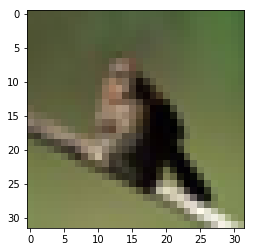

bird


In [9]:
def to_rgb(vec):
    start = 0
    end = 255
    width = end - start 
    return (vec - vec.min())/vec.ptp() * width + start
    
def tensor_to_image(img, mean=0, std=1):
    """convert a tensor to an image"""
    img = np.transpose(img, (1, 2, 0))
    #img = (img*std+ mean)*255
    img = to_rgb(img)
    img = img.astype(np.uint8)    
    return img 

data = iter(trainloader).next()
imgs, labels = data
plt.imshow(tensor_to_image(imgs[0].numpy())) 
plt.show()
print(classes[labels[0]])

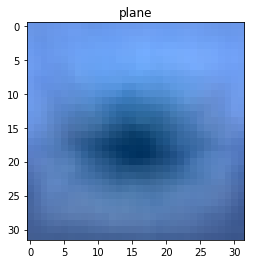

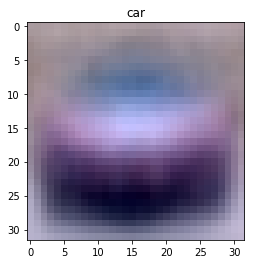

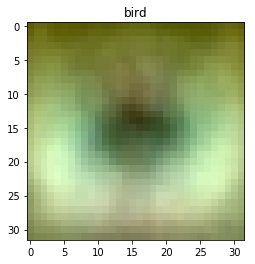

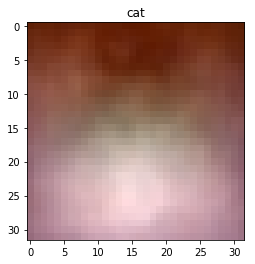

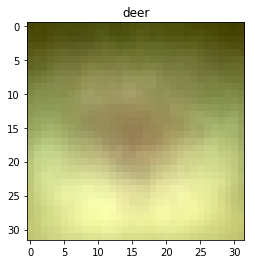

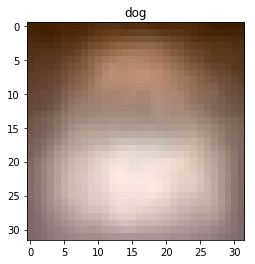

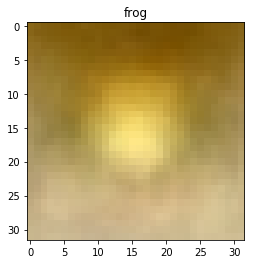

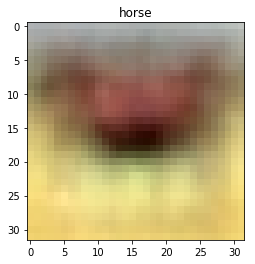

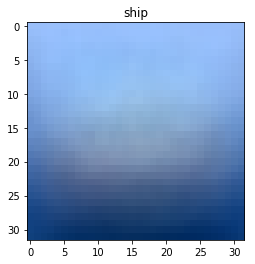

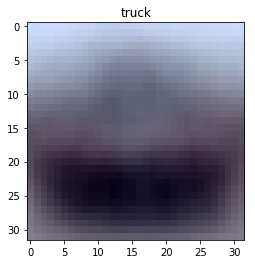

In [10]:
for p in model.parameters():
    W = p.detach().numpy()
    for i, cifar_class in enumerate(classes):
        template = to_rgb(W[i])
        template = np.reshape(template, (3, 32, 32))
        plt.title(cifar_class)
        plt.imshow(tensor_to_image(template)) 
        plt.show()
    break